In [8]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

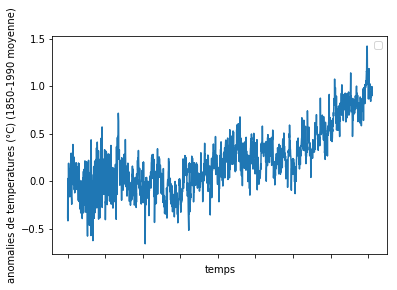

In [33]:
data = pd.read_csv(
    "dataset.txt",
    delim_whitespace=True,
    usecols=[0, 1],
    header=None
)

data['year'] = data.iloc[:, 0].apply(lambda x: x.split("/")[0]).astype(int)
data['month'] = data.iloc[:, 0].apply(lambda x: x.split("/")[1]).astype(int)
data = data.rename(columns={1: "value"})
data = data.iloc[:, 1:]
data = data.set_index(['year', 'month'])
data -= data.loc[1850:1900].mean()
data.plot()
data = data.reset_index()
plt.xlabel("temps")
plt.ylabel(u"anomalies de temperatures (°C) (1850-1990 moyenne)")
plt.legend("")
data.to_csv("processed_dataset.csv", index=False)
